In [265]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from collections import Counter


In [266]:
df=pd.read_csv("netflix_titles.csv")

In [267]:
df.shape

(7787, 12)

the fields with missing value : director,cast,country,date_added,rating 

In [61]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [268]:
df['country']=df['country'].fillna(df['country'].mode()[0])
df['rating']=df['rating'].fillna(df['rating'].mode()[0])
df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
df['director'].fillna('missing',inplace=True)
df['cast'].fillna('missing',inplace=True)

In [269]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [270]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [64]:
Counter(df['country']).most_common(1)

[('United States', 3062)]

Text(0.5, 1.0, 'Movies and TV Shows')

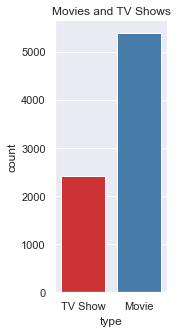

In [271]:

plt.figure(figsize= (2,5))
sns.set_style(style = 'darkgrid')
ax = sns.countplot(x = 'type',data  = df,palette='Set1')
plt.title('Movies and TV Shows')

Text(0, 0.5, 'Total Count')

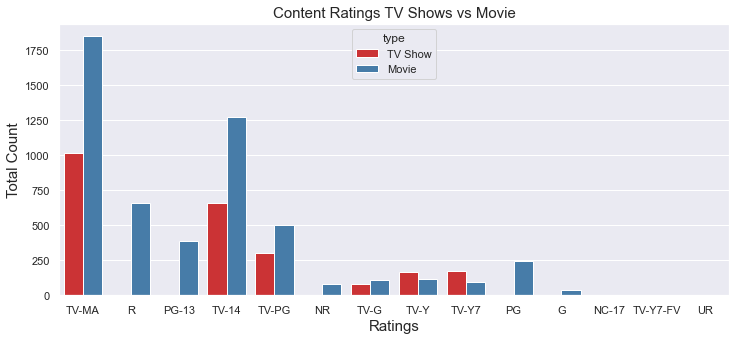

In [272]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (12,5))
sns.countplot(x= 'rating',data=df,hue = 'type',palette='Set1' )
plt.title('Content Ratings TV Shows vs Movie', fontsize = 15)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

Following Movie rating (https://en.wikipedia.org/wiki/Motion_picture_content_rating_system)
G : General (All ages admitted)
PG: Parental Guidance
PG-13 : Parents strongly cautioned (over 13 years)
R : Restricted,require accompanying parent(over 17 years )
NC-17 : no one 17 and under admitted 

IF [Rating]=='G' THEN 'G'
ELSEIF  [Rating]=='TV-G' THEN 'G'
ELSEIF  [Rating]=='TV-Y' THEN 'G'
ELSEIF  [Rating]=='PG' THEN 'PG'
ELSEIF  [Rating]=='TV-PG' THEN 'PG'
ELSEIF  [Rating]=='TV-Y7' THEN 'PG'
ELSEIF  [Rating]=='TV-Y7-FV' THEN 'PG'
ELSEIF  [Rating]=='PG-13' THEN 'PG-13'
ELSEIF  [Rating]=='TV-14' THEN 'PG-13'
ELSEIF  [Rating]=='R' THEN 'R'
ELSEIF  [Rating]=='TV-MA' THEN 'R'
ELSE 'NC-17'
END

In [278]:
df['rating_group']=df['rating'].replace({'TV-G':'G','TV-Y':'G','TV-PG':'PG','TV-Y7-FV':'PG','TV-14':'PG-13','TV-MA':'R','UR':'NC-17','NR':'NC-17'})

Text(0, 0.5, 'Total Count')

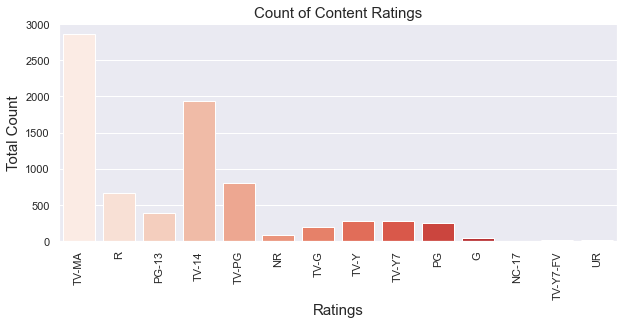

In [273]:
sns.set_style(style = 'darkgrid')
plt.figure(figsize = (10,4))
sns.countplot(x ='rating', data = df,palette='Reds')
plt.title('Count of Content Ratings',fontsize = 15)
plt.xticks(rotation =90)
plt.xlabel('Ratings',fontsize = 15)
plt.ylabel('Total Count',fontsize = 15)

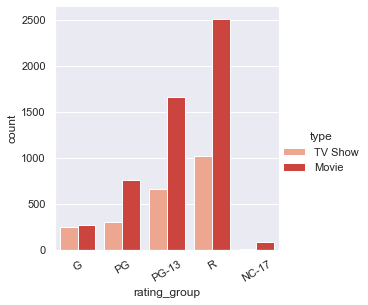

In [283]:
rating_order=['G','PG','PG-13','R','NC-17']
g=sns.catplot(x='rating_group',data=df,kind='count',palette='Reds',hue='type',order=rating_order,height=4,aspect=1)
g.set_xticklabels(rotation=30)

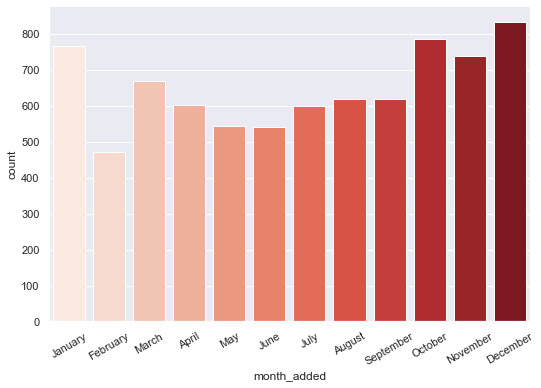

In [264]:
order_m=['January','February','March','April','May','June','July','August','September','October','November','December']
g=sns.catplot(x='month_added',data=df,kind='count',palette='Reds',height=5,aspect=1.5,order=order_m)
g.set_xticklabels(rotation=30)

In [195]:
df['timeStamp']=pd.to_datetime(df['date_added'])
df['day_added']=df['timeStamp'].apply(lambda time:time.dayofweek) #0:monday,6:sun

(<seaborn.axisgrid.FacetGrid at 0x1f2394a8c40>,
 <seaborn.axisgrid.FacetGrid at 0x1f2394a8c40>)

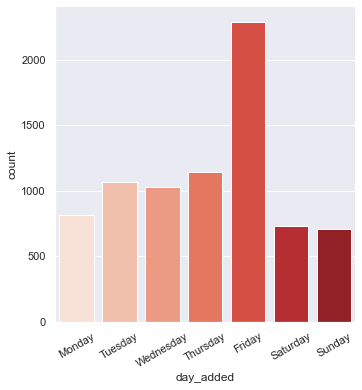

In [258]:
g=sns.catplot(x='day_added',data=df,kind='count',palette='Reds',height=5,aspect=1)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
(g.set_xticklabels(days),g.set_xticklabels(rotation=30))

In [187]:
df['day_added'].rename()

0       4
1       4
2       3
3       3
4       2
       ..
7782    0
7783    5
7784    4
7785    5
7786    6
Name: day_added, Length: 7787, dtype: int64

In [52]:
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

In [53]:
df['main_country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784           missing
7785         Australia
7786    United Kingdom
Name: main_country, Length: 7770, dtype: object

In [42]:
cast_group=df['cast'].str.split(',')
cast_group.head()

0    [João Miguel,  Bianca Comparato,  Michel Gomes...
1    [Demián Bichir,  Héctor Bonilla,  Oscar Serran...
2    [Tedd Chan,  Stella Chung,  Henley Hii,  Lawre...
3    [Elijah Wood,  John C. Reilly,  Jennifer Conne...
4    [Jim Sturgess,  Kevin Spacey,  Kate Bosworth, ...
Name: cast, dtype: object

In [44]:
cast={}
cast[name]+=1 if name in cast_group.keys() else cast[name] =1 for name in cast_group:

SyntaxError: invalid syntax (<ipython-input-44-0197efb3fbc5>, line 2)

In [45]:
cast ={}
for name in cast_group:
    if name in cast_group.keys():
        cast[name]+=1
    else:
        cast[name]=1
return cast

TypeError: unhashable type: 'list'

In [32]:
df.groupby('type').count()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,5372,5372,5372,5372,5372,5372,5372,5372,5372,5372,5372
TV Show,2398,2398,2398,2398,2398,2398,2398,2398,2398,2398,2398


In [33]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df['type']=df['type'].astype('category')
df['rating']=df['rating'].astype('category')


In [7]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [8]:
df['date_added'].dtypes

dtype('<M8[ns]')

In [76]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,s1,TV Show,3%,missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,January


Data Manipulate

In [69]:
df['listed_in'].describe()

count              7787
unique              492
top       Documentaries
freq                334
Name: listed_in, dtype: object

In [9]:
type_movie=df[df['type']=='Movie']

In [10]:
type_movie.isna().sum()

show_id           0
type              0
title             0
director        163
cast            426
country         230
date_added        0
release_year      0
rating            5
duration          0
listed_in         0
description       0
year_added        0
month_added       0
dtype: int64

In [11]:
movie.describe()

NameError: name 'movie' is not defined

In [86]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1512
release_year      73
rating            14
duration         216
listed_in        492
description     7769
year_added        14
month_added       12
dtype: int64